<a href="https://colab.research.google.com/github/Srivardini11/lark/blob/main/Trail_2_Lightkurve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Installs**

In [2]:
!pip install lightkurve --quiet

     |████████████████████████████████| 247 kB 12.6 MB/s 
     |████████████████████████████████| 41 kB 102 kB/s 
     |████████████████████████████████| 98 kB 1.8 MB/s 
     |████████████████████████████████| 4.5 MB 39.3 MB/s 
     |████████████████████████████████| 832 kB 39.3 MB/s 
     |████████████████████████████████| 54 kB 1.2 MB/s 
     |████████████████████████████████| 3.6 MB 49.7 MB/s 


# **Imports**

In [55]:
import matplotlib.pyplot as plt
import matplotlib 
import lightkurve as lk
import numpy as np
from astropy.convolution import convolve, Box1DKernel

matplotlib.rcParams['figure.figsize'] = (15,8)

# **The source code**

**Search the light curves using the python module “lightkurve”:** It is an inbuilt module using astropy explicitly to study lightcurves. It addresses the name, it’s mission,cadence, quarter and other properties. The searched data is downloaded to be worked on. This gives all the flux intensity of the object when the Kepler telescope was in the quarter 9 position. Quarters are the time period of 90 days from the time of the telescope commission. When 90 days get over, the telescope changes an angle of 90 degrees and collects the flux from that view. So, the cycle repeats after every four times.  There are fluxes here that are empty which appear as ‘Nans’, which appear as data gaps and these can be removed by using the function “remove_nans()”.

In [5]:
source = lk.search_lightcurve("kplr011446443", author="Kepler", cadence="long",quarter = 9).download()
source

time,flux,flux_err,quality,timecorr,centroid_col,centroid_row,cadenceno,sap_flux,sap_flux_err,sap_bkg,sap_bkg_err,pdcsap_flux,pdcsap_flux_err,sap_quality,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
,electron / s,electron / s,,d,pix,pix,,electron / s,electron / s,electron / s,electron / s,electron / s,electron / s,,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix
object,float32,float32,int32,float32,float64,float64,int32,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
808.5163399053927,nan,nan,1100000000000000000,-6.185146e-04,621.20352,848.96602,34237,4.0461984e+05,1.7136831e+01,5.0124648e+03,8.9268464e-01,nan,nan,1100000000000000000,nan,nan,nan,nan,621.20352,4.3687072e-05,848.96602,5.6298253e-05,1.3463269e-02,6.4038746e-02
808.5367739679132,4.0344128e+05,1.7206509e+01,1100000000010000000,-6.180521e-04,621.20359,848.96577,34238,4.0456928e+05,1.7136110e+01,5.0124282e+03,8.9312845e-01,4.0344128e+05,1.7206509e+01,1100000000010000000,nan,nan,nan,nan,621.20359,4.3693453e-05,848.96577,5.6304852e-05,1.3538879e-02,6.3926294e-02
808.5572080306083,4.0337869e+05,1.7208021e+01,1100000000010000000,-6.175894e-04,621.20382,848.96548,34239,4.0463694e+05,1.7135906e+01,5.0141406e+03,8.9341098e-01,4.0337869e+05,1.7208021e+01,1100000000010000000,nan,nan,nan,nan,621.20382,4.3685250e-05,848.96548,5.6284840e-05,1.3703740e-02,6.3693479e-02
808.5776420934708,4.0330584e+05,1.7220509e+01,1100000000000000000,-6.171265e-04,621.20379,848.96526,34240,4.0463225e+05,1.7135572e+01,5.0123887e+03,8.9193231e-01,4.0330584e+05,1.7220509e+01,1100000000000000000,nan,nan,nan,nan,621.20379,4.3682561e-05,848.96526,5.6277422e-05,1.3627556e-02,6.3662983e-02
808.5980761565152,4.0319994e+05,1.7213947e+01,1100000000000000000,-6.166635e-04,621.20382,848.96496,34241,4.0457156e+05,1.7134609e+01,5.0121719e+03,8.9264071e-01,4.0319994e+05,1.7213947e+01,1100000000000000000,nan,nan,nan,nan,621.20382,4.3684890e-05,848.96496,5.6287772e-05,1.3677599e-02,6.3459679e-02
808.6185103196767,4.0320144e+05,1.7194426e+01,1100000000000000000,-6.162003e-04,621.20380,848.96475,34242,4.0457700e+05,1.7134583e+01,5.0116235e+03,8.9327544e-01,4.0320144e+05,1.7194426e+01,1100000000000000000,nan,nan,nan,nan,621.20380,4.3686217e-05,848.96475,5.6279903e-05,1.3655188e-02,6.3273534e-02
808.6389443830631,4.0327297e+05,1.7211208e+01,1100000000000000000,-6.157369e-04,621.20391,848.96443,34243,4.0462319e+05,1.7135393e+01,5.0153452e+03,8.9344496e-01,4.0327297e+05,1.7211208e+01,1100000000000000000,nan,nan,nan,nan,621.20391,4.3681113e-05,848.96443,5.6273908e-05,1.3645805e-02,6.3136406e-02
808.6593783465723,4.0331969e+05,1.7217007e+01,1100000000000000000,-6.152734e-04,621.20391,848.96437,34244,4.0462300e+05,1.7135370e+01,5.0119590e+03,8.9336938e-01,4.0331969e+05,1.7217007e+01,1100000000000000000,nan,nan,nan,nan,621.20391,4.3679975e-05,848.96437,5.6272947e-05,1.3595453e-02,6.3111745e-02


To visually picture the flux intensity downloaded above, we plot it against the time period. Since the object being in Quarter 9, the time duration is from 810 to 900 days. These light curves are downloaded defaultly with the Pre-search Data Conditioned flux. For the light curves to be independent of individual flux density, we normalize it by dividing the median of the flux and flux error from the original and thus the readings of the flux are obtained between 0 and 1.

SAP Flux: Simple Aperture Photometry flux; flux after summing the calibrated pixels within the optimal aperture

PDCSAP Flux: Pre-search Data Conditioned Simple Aperture Photometry; these are the flux values nominally corrected for instrumental variations.


**The original source light curve of PDCSAP Flux** 


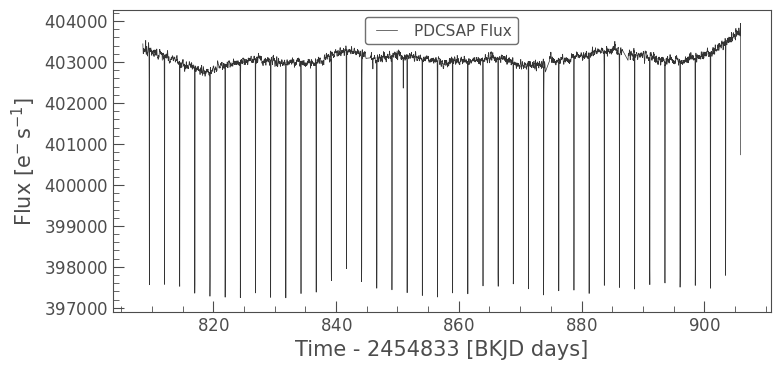

In [ ]:
source.plot(label='PDCSAP Flux', normalize=False)

**The normalized source light curve of PDCSAP Flux**

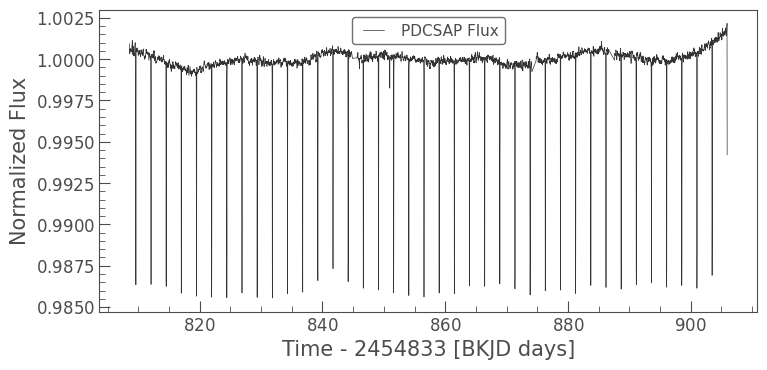

In [ ]:
The_original_curve = source.plot(label='PDCSAP Flux', normalize=True)

**Visualizing all the data points available of the source:** 

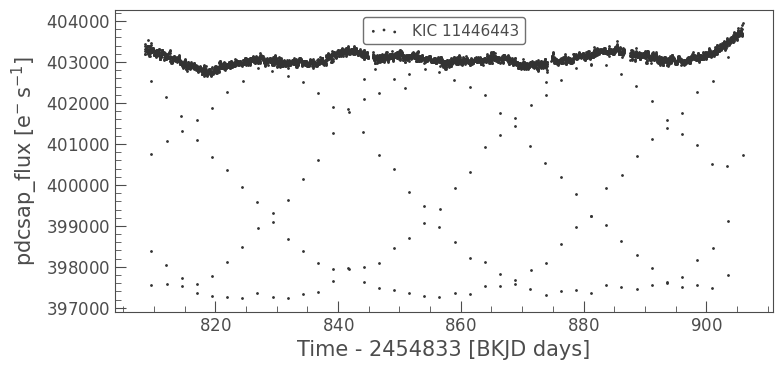

In [ ]:
source.scatter(column='pdcsap_flux' ,normalize=False)

**Method 1:** 

**Step1: Linear interpolation to connect all the data gaps** 

**Step2: Transit removal**

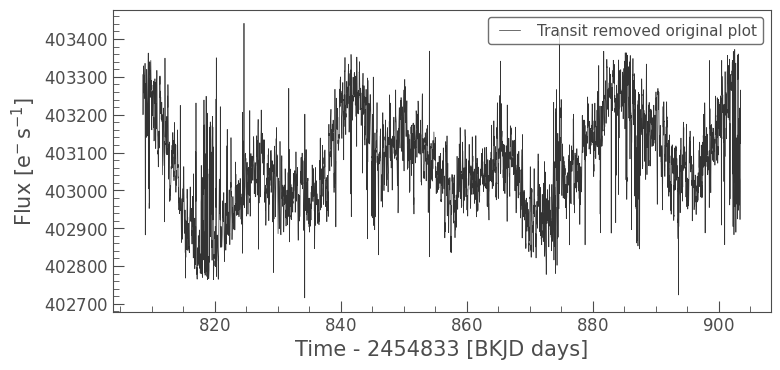

In [7]:
rem_tran_lc=source.remove_outliers(sigma = 2.5).remove_nans().fill_gaps()
rem_tran_lc.plot(label='Transit removed original plot', normalize = False)

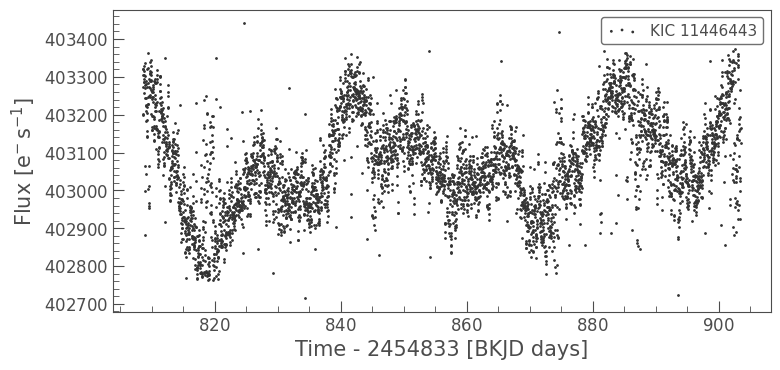

In [8]:
rem_tran_lc.scatter()

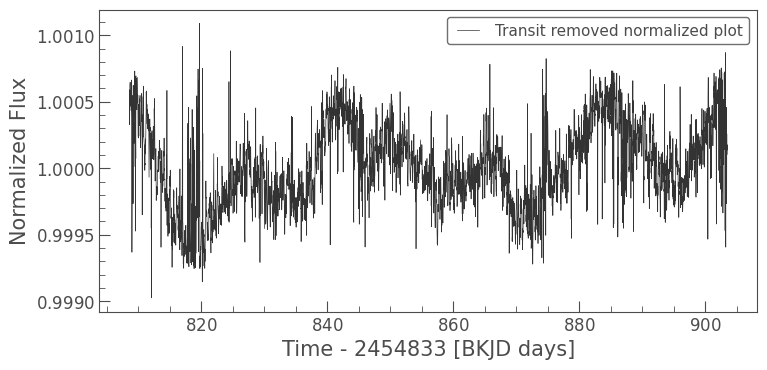

In [9]:
rem_tran_lc=source.remove_outliers(sigma = 2.5).remove_nans().fill_gaps()
rem_tran_lc.plot(label='Transit removed normalized plot', normalize = True)

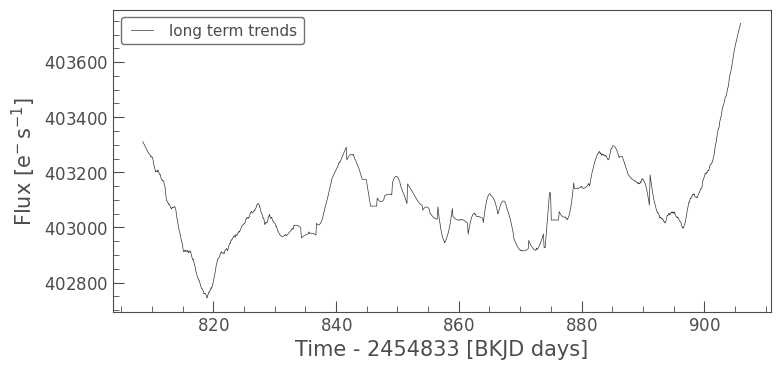

In [23]:
trend_lc.plot(label='long term trends')

**Method 1:** 

**Step3: Remove Low frequency trend**

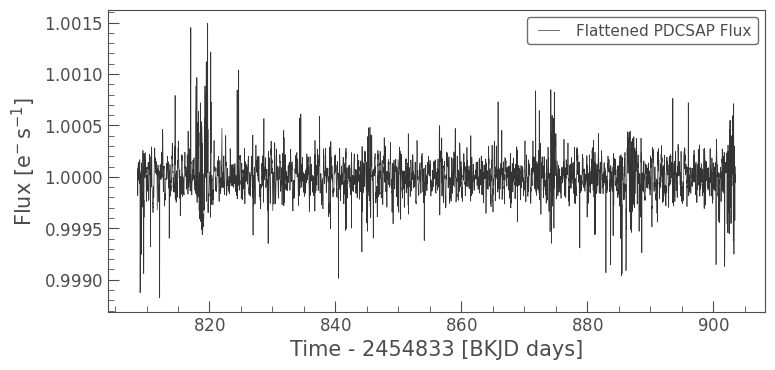

In [10]:
flat_trans_lc, trend =rem_tran_lc.flatten(window_length=101, polyorder=2, sigma=2.5,return_trend=True)
flat_trans_lc.plot(label='Flattened PDCSAP Flux')

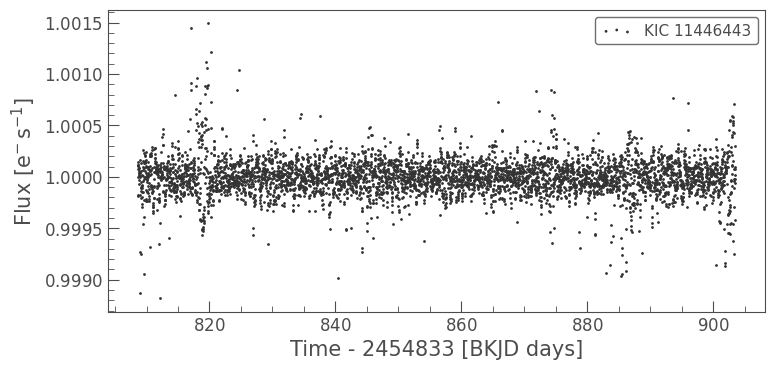

In [11]:
flat_trans_lc.scatter()

**Method 2:** 

**Step1: Linear interpolation to connect all the data gaps** 

**Step2: Remove Low frequency trend**



In [12]:
flatten_lc, trend_lc = source.flatten(window_length=101, polyorder=2, sigma=2.5,return_trend=True)

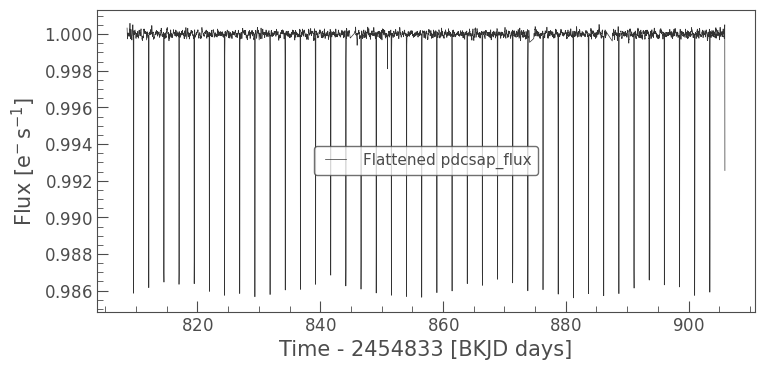

In [13]:
flatten_lc.plot(label='Flattened pdcsap_flux')

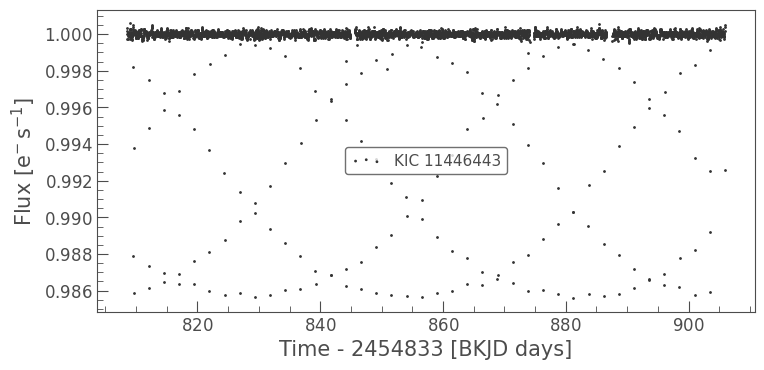

In [14]:
flatten_lc.scatter()

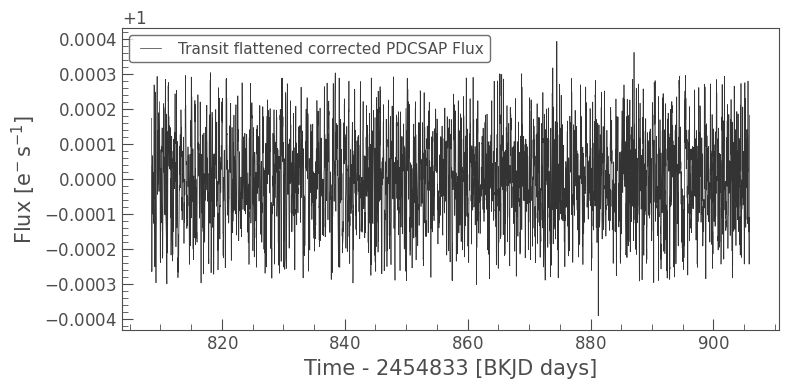

In [28]:
trans_flat_lc = flatten_lc.remove_outliers(sigma = 2.5).fill_gaps()
trans_flat_lc.plot( label='Transit flattened corrected PDCSAP Flux')

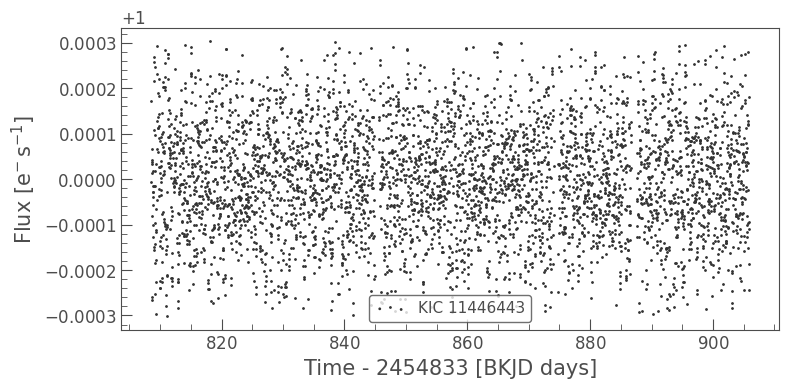

In [25]:
trans_flat_lc.scatter()

In [29]:
len(trans_flat_lc)

4763

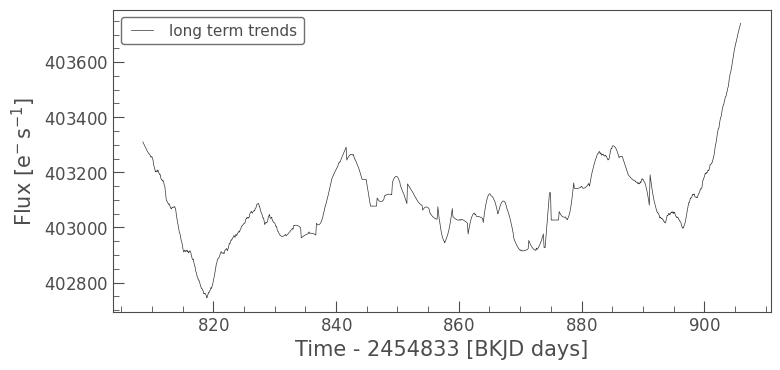

In [ ]:
trend_lc.plot(label='long term trends')

**Unflattened curve**

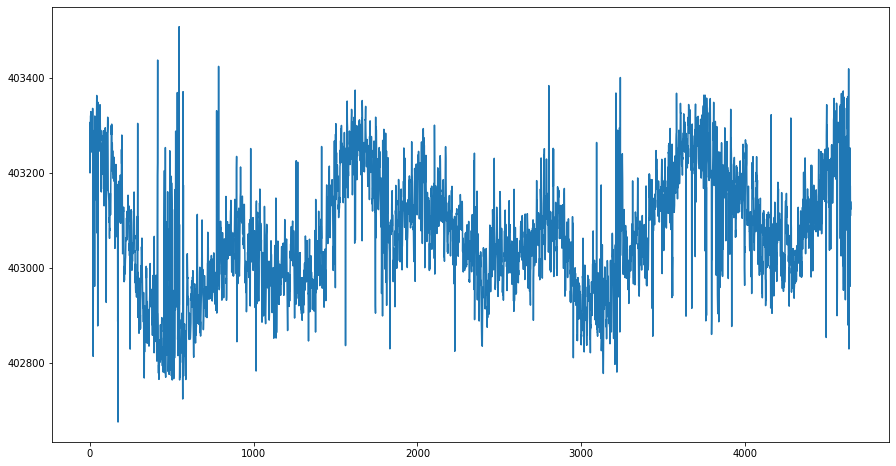

In [15]:
flux = rem_tran_lc.flux.value
time = rem_tran_lc.time.value
plt.figure(figsize=(15,8))
plt.plot(flux)

In [95]:
smoothed_signal = convolve(flux, Box1DKernel(16))

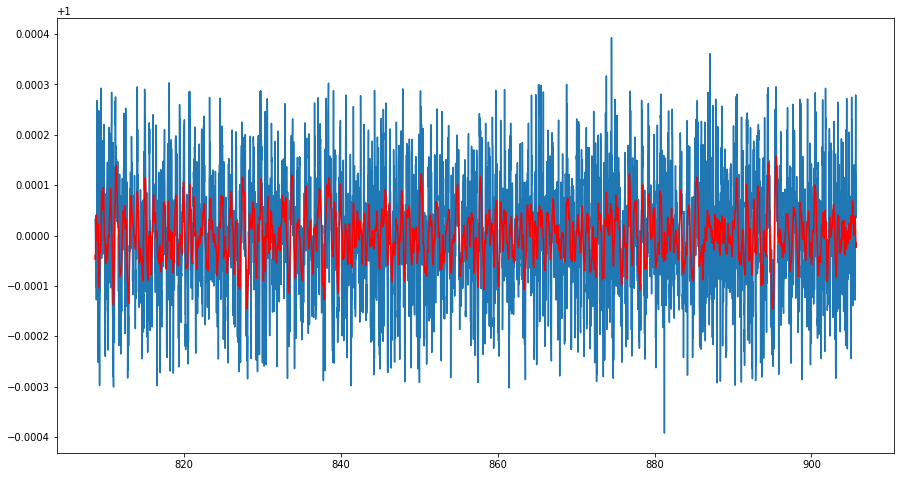

In [103]:
index = 8
plt.plot(time[index:-index],flux[index:-index])
plt.plot(time[index:-index], smoothed_signal[index:-index],color='red')

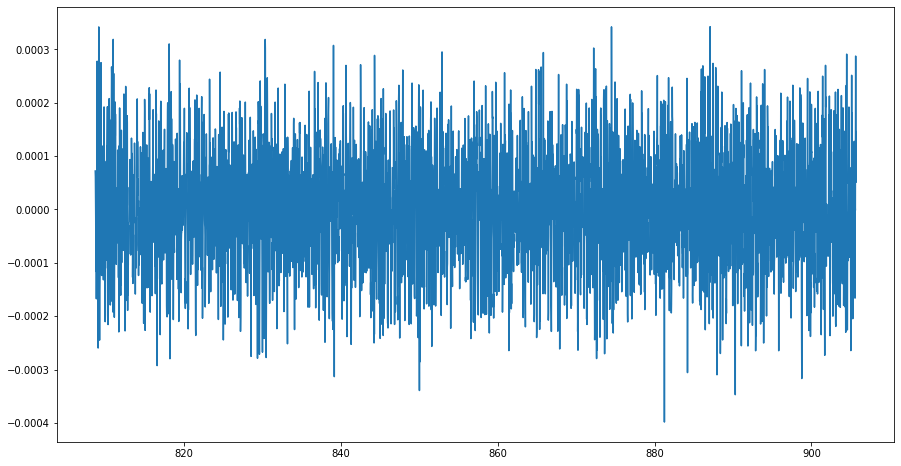

In [105]:
flkr=flux[8:-8]-smoothed_signal[8:-8]
plt.plot(time[8:-8],flkr)

**Flattened curve**

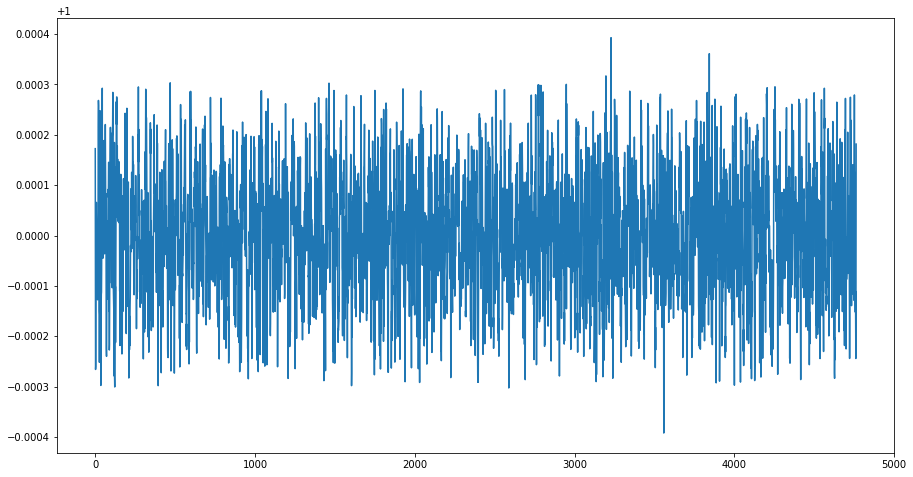

In [106]:
flux1 = trans_flat_lc.flux.value
time1 = trans_flat_lc.time.value
plt.figure(figsize=(15,8))
plt.plot(flux1)

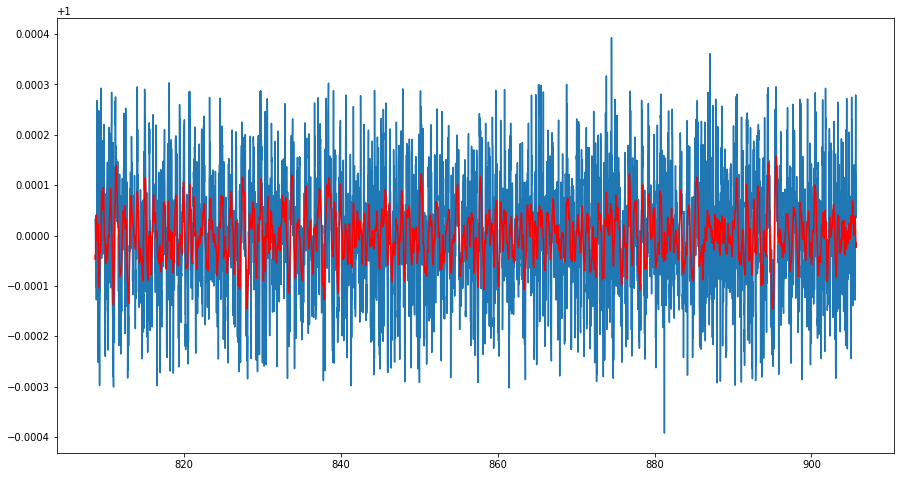

In [107]:
smoothed_signal1 = convolve(flux1, Box1DKernel(16))
id=8
plt.plot(time1[id:-id],flux1[id:-id])
plt.plot(time1[id:-id], smoothed_signal1[id:-id],color='red')

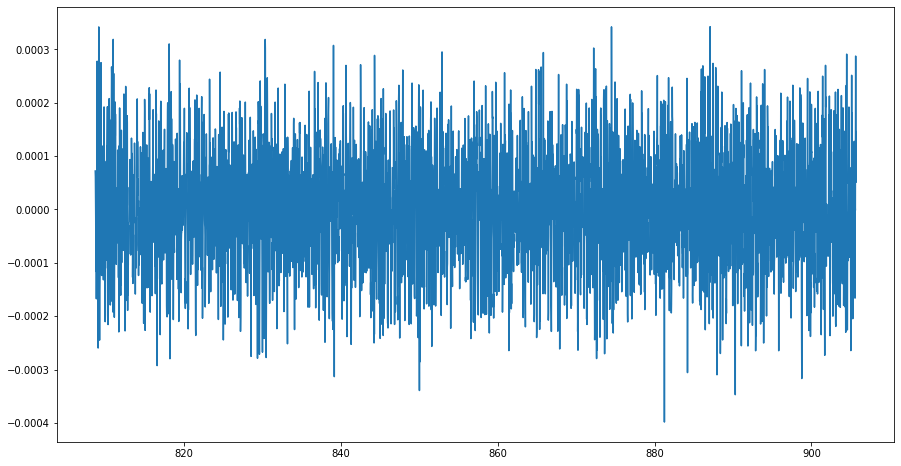

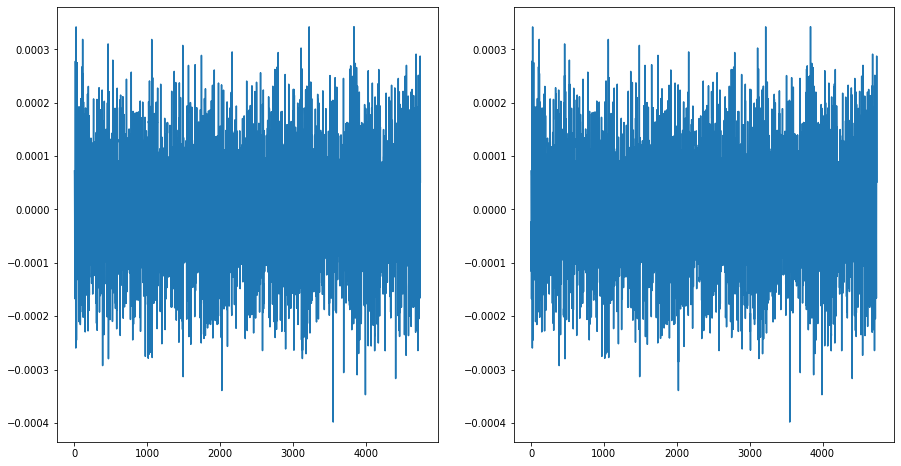

In [109]:
id=8
flkr1=flux1[id:-id]-smoothed_signal1[id:-id]
plt.plot(time1[id:-id],flkr1)
fig, ax = plt.subplots(1,2, figsize=(15,8))
ax[0].plot(flkr)
ax[1].plot(flkr1)

In [80]:
r_max = np.where(flux==flux.max()) 
r_min = np.where(flux==flux.min())
flux[r_max] , time[r_max] , flux[r_min]

(array([403507.70915733]), array([819.71423228]), array([402675.57518085]))

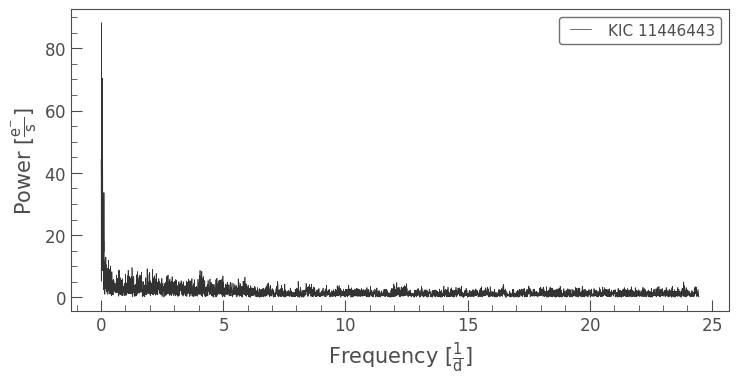

In [81]:
plc = rem_tran_lc.to_periodogram()
plc.plot()

In [82]:
smoothed_signal.shape,time.shape

((4647,), (4647,))